In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv("../data/medications.csv")
data_two = pd.read_csv("../data/medications2.csv")

In [63]:
types = data[['PATIENT', 'CODE', 'DISPENSES']]
type2 = data_two[['PATIENT', 'CODE', 'DISPENSES']]

In [64]:
category_group = types.groupby(['PATIENT', 'CODE'])
cagegory_group2 = type2.groupby(['PATIENT', 'CODE'])

In [65]:
medication_list = ['314076', '310798', '308136']

In [66]:
patient_list = data[data.CODE.isin(medication_list)]
patients = pd.DataFrame(patient_list)
group = patients.groupby(patients.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})
group

,index,Therapy Count
0,00077a42-9080-43c6-8dc5-fc77e9c92262,123
1,002d4e86-d893-48dc-9737-2b7c7fd45958,198
2,004d2bfd-8374-438d-a390-cce73674c96e,48
3,005ae27b-e05c-437e-acc7-e56547f88024,6
4,008b82f9-da40-492d-a828-4431c878b9f3,2
...,...,...
3218,ffa1a5fb-cfc6-4a9f-bbca-60937141fe34,52
3219,ffa6897a-38ae-4036-b1dc-466e2e8a1698,21
3220,ffb1ce38-4a75-4711-a80e-317b76a054af,65
3221,ffb9503f-013c-4d35-b06b-f3d6ec18996d,34


In [67]:
patient_list_two = data_two[data_two.CODE.isin(medication_list)]
patients2 = pd.DataFrame(patient_list_two)
group2 = patients2.groupby(patients2.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})
group2

,index,Therapy Count
0,00143565-f064-43e6-8266-64e777c5e8dd,144
1,00376f10-bbd1-4e3c-9fdf-25f95dbead08,148
2,00423d75-289d-48b2-b5bb-5c7af369af62,45
3,004b757e-52aa-4ff4-afe5-2d9665170cc2,44
4,006299bf-8592-4ae3-94a1-4acd5d226bad,17
...,...,...
3195,ffcbb365-31f8-4188-a0b0-7a2e5179770c,75
3196,ffcece9b-cdd2-4771-943a-c8ae26ee9d02,66
3197,ffee25a1-05a7-4ee4-b078-a1405ee33e67,38
3198,fff65c2e-2f84-437c-8969-8cbfb860b969,26


In [68]:
patient_freq = patients[['PATIENT', 'CODE']].drop_duplicates(keep=False)
dataa = pd.DataFrame(patient_freq)
group = dataa.groupby(dataa.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})

In [69]:
group

,index,Therapy Count
0,008b82f9-da40-492d-a828-4431c878b9f3,2
1,00901182-c8b6-4b74-9ee8-79e3b4776fdc,1
2,023ce4c8-5ce8-48dc-a460-457d2e0914fd,1
3,09886872-098c-44ba-9a27-6e4006befc82,2
4,0e24b132-0dba-4302-b079-1f0c423f04d9,2
5,10e087b5-2492-4ffc-8f4b-f0287ad08a63,1
6,19bc6bbb-6eb4-4bcf-8d33-dac9cdc07933,1
7,19f16a90-fc89-48d0-8c56-015ade584bc3,3
8,1d0a22aa-7ce9-46e2-af63-e8eb5754b23f,1
9,1d0cf20b-25ce-4ac1-a16e-b3ac28835bc4,2


In [70]:
patient_freq2 = patients2[['PATIENT', 'CODE']].drop_duplicates(keep=False)
dataa2 = pd.DataFrame(patient_freq2)
group2 = dataa2.groupby(dataa2.PATIENT.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Therapy Count'})

In [71]:
num_therapy = group['Therapy Count'].value_counts()
label_therapy = ['Dual-', 'Mono-', 'Tri-']
num_therapy

2    24
1    21
3     9
Name: Therapy Count, dtype: int64

Text(0.5, 1.0, 'Therapy')

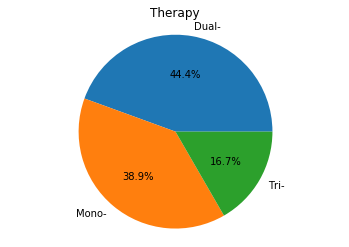

In [72]:
fig, ax = plt.subplots()
ax.pie(num_therapy, labels=label_therapy, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Therapy')

In [73]:
num_therapy2 = group2['Therapy Count'].value_counts()
label_therapy2 = ['Mono-', 'Dual-', 'Tri-']
num_therapy2

1    18
2    14
3     8
Name: Therapy Count, dtype: int64

Text(0.5, 1.0, 'Therapy')

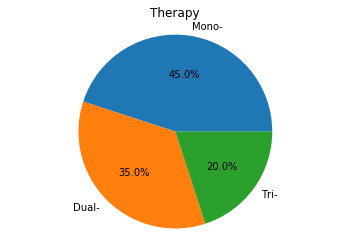

In [62]:
fig, ax = plt.subplots()
ax.pie(num_therapy2, labels=label_therapy2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Therapy')

In [58]:
nums_med = patients['DESCRIPTION'].value_counts()
stats_med = patients['DESCRIPTION'].value_counts().keys()

Text(0.5, 1.0, 'Frequency of Medication')

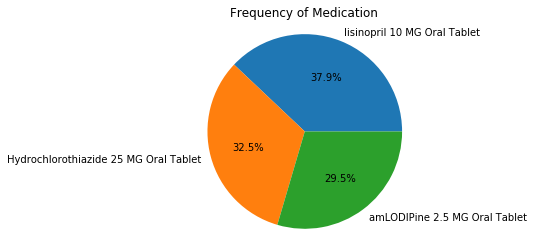

In [59]:
fig, ax = plt.subplots()
ax.pie(nums_med, labels=stats_med, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Frequency of Medication')